In [1]:
%matplotlib inline
%load_ext memory_profiler

import os
import time
import datetime
import sys
import pickle
import scanpy as sc
from scipy import sparse
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size = 8)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
sns.set_style("ticks")
sc.set_figure_params(dpi=300,dpi_save=300,
                     frameon=False,
                     fontsize=8)

# HBEC

In [2]:

# fps
sdfp = '/home/ngr4/project/sccovid/shared/data/processed/'
pfp = '/home/ngr4/project/edge_feat/results/'
pdfp = '/home/ngr4/project/sccovid/data/processed/'
sc.settings.figdir = pfp
sc.settings._vector_friendly=True

def loader(fname,fpath,backed=None) : 
    start = time.time()
    adata = sc.read_h5ad(filename=os.path.join(fpath,fname),backed=backed)
    print('loaded @'+datetime.datetime.now().strftime('%y%m%d.%H:%M:%S'))
    print('took {:.2f}-s to load data'.format(time.time()-start))
    return adata

def writer(fname,fpath,AnnData) :
    start = time.time()
    AnnData.write(os.path.join(fpath,fname))
    print('saved @'+datetime.datetime.now().strftime('%y%m%d.%H:%M:%S'))
    print('took {:.2f}-s to save data'.format(time.time()-start))
    

if True :
    # load personal
    fname='scv2_200428.h5ad'
    %memit adata = loader(fname,pdfp)

    


loaded @200601.16:32:07
took 21.51-s to load data
peak memory: 18418.32 MiB, increment: 18227.19 MiB


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [3]:
adata

AnnData object with n_obs × n_vars = 77650 × 24714
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pmito', 'n_genes', 'Condition', 'louvain', 'scv2+', 'louvain_res0.5', 'ctype_res0.5', 'ctype', 'subctype', 'init_ctype', 'scv2_5+', 'scv2_10+', 'raw', 'res_inf', 'ees_inf'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_phate', 'X_umap'
    varm: 'PCs'
    layers: 'imputed_bbknn'
    obsp: 'distances', 'connectivities'

In [4]:
# basic counting
adata.obs.groupby('Condition').sum()['scv2_10+']

Condition
1dpi     144
2dpi    1428
3dpi    3173
Mock       3
Name: scv2_10+, dtype: int64

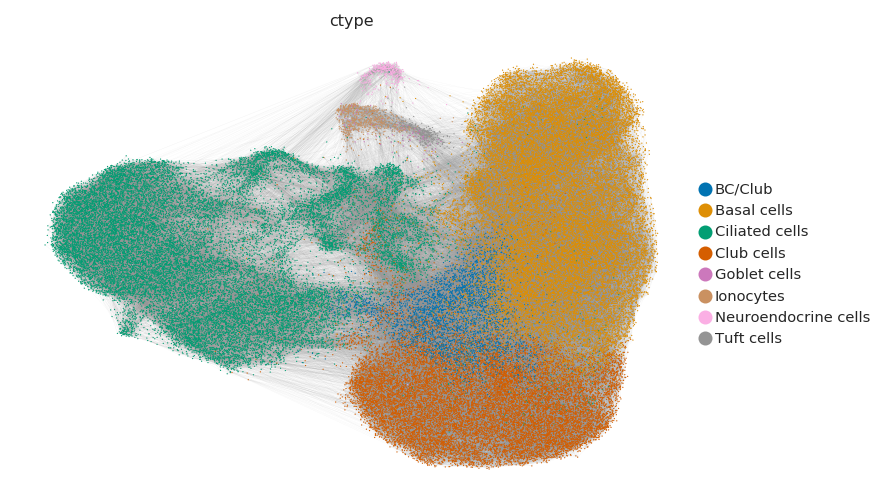

In [8]:
sc.pl.umap(adata,edges=True,color='ctype',palette=sns.color_palette('colorblind'),edges_width=0.01, save='_hbec_ctype.pdf')

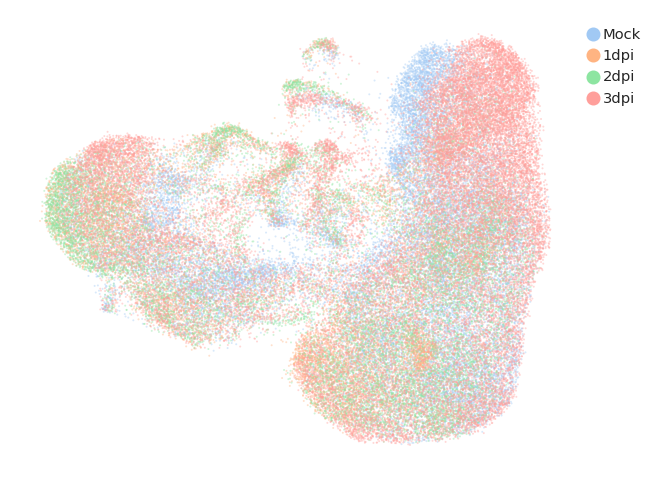

In [15]:

fig,ax=plt.subplots(1,1,figsize=(5,4))
sns.scatterplot(
    x=adata.obsm['X_umap'][:,0],
    y=adata.obsm['X_umap'][:,1],
    hue=adata.obs['Condition'].to_list(),
    palette=sns.color_palette('pastel')[0:4],
    ax=ax,
    linewidth=0,
    s=1,
    alpha=0.4,
    rasterized=True,
)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(bbox_to_anchor=(1,1))
ax.axis('off')
fig.savefig(os.path.join(pfp,'hbec_umap_condition.pdf'), bbox_inches='tight', dpi=300)

# Liao et al. 2020

In [16]:

pdfp = '/home/ngr4/project/covid_lung/data/processed/'

if True :
    # load personal
    fname='liao2020.h5ad'
    %memit ldata = loader(fname,pdfp)

loaded @200601.17:01:05
took 3.78-s to load data
peak memory: 21104.00 MiB, increment: 2182.36 MiB


In [31]:
ldata

AnnData object with n_obs × n_vars = 90695 × 25626
    obs: 'batch', 'n_genes', 'louvain', 'init_ctype', 'Condition'
    var: 'gene_ids', 'feature_types', 'genome-C100', 'genome-C141', 'genome-C142', 'genome-C143', 'genome-C144', 'genome-C145', 'genome-C146', 'genome-C148', 'genome-C149', 'genome-C152', 'genome-C51', 'genome-C52', 'n_cells'
    uns: 'louvain', 'neighbors', 'pca', 'init_ctype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [34]:
ldata.obs.groupby('Condition').count()

,batch,n_genes,louvain,init_ctype
Condition,,,,
Control,28056,28056,28056,28056
Mild,9710,9710,9710,9710
Severe,52929,52929,52929,52929


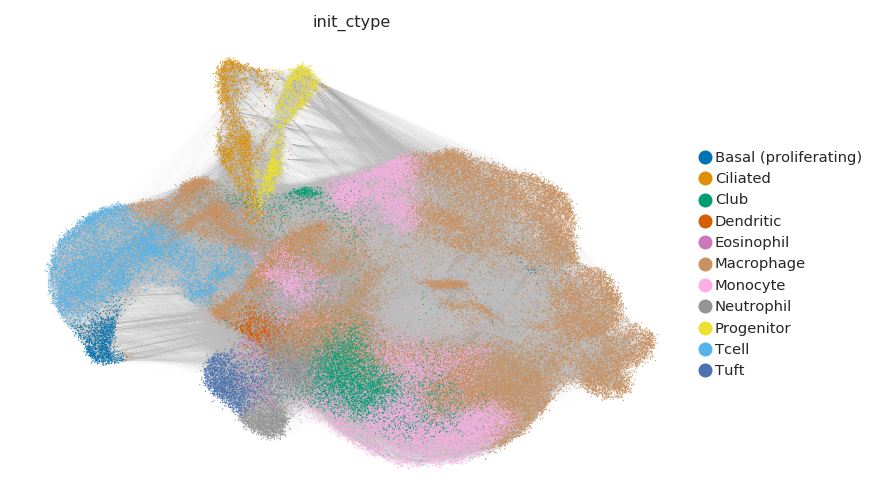

In [33]:
sc.pl.umap(ldata,edges=True,color='init_ctype',palette=sns.color_palette('colorblind')+sns.color_palette('deep')[0:3],edges_width=0.003, save='_liao_ctype.pdf')

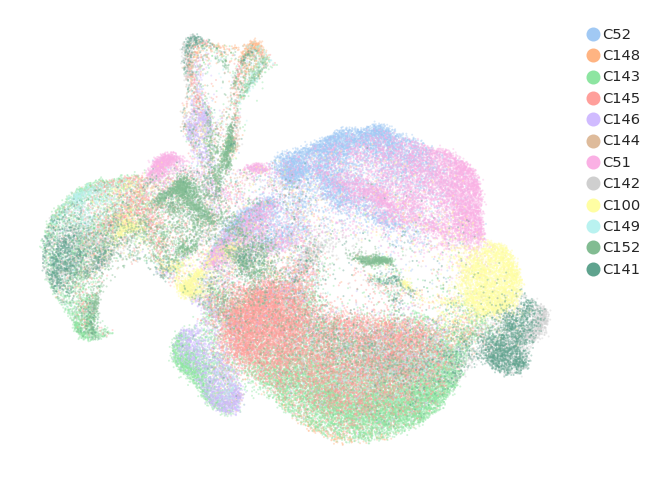

In [29]:

fig,ax=plt.subplots(1,1,figsize=(5,4))
sns.scatterplot(
    x=ldata.obsm['X_umap'][:,0],
    y=ldata.obsm['X_umap'][:,1],
    hue=ldata.obs['batch'].to_list(),
    palette=sns.color_palette('pastel')+sns.cubehelix_palette(8,start=.5, rot=-.75)[2:4],
    ax=ax,
    linewidth=0,
    s=1,
    alpha=0.4,
    rasterized=True,
)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(bbox_to_anchor=(1,1))
ax.axis('off')
fig.savefig(os.path.join(pfp,'liao_umap_batch.pdf'), bbox_inches='tight', dpi=300)

# Check all pkls

In [36]:
def loadpkl(filename):
    with open (filename, 'rb') as f:
        temp = pickle.load(f)
        f.close()
    return temp

In [43]:
fps = [
    '/home/ngr4/project/sccovid/data/processed/hbec_train_200529.pkl',
    '/home/ngr4/project/sccovid/data/processed/hbec_val_200529.pkl',
    '/home/ngr4/project/sccovid/data/processed/hbec_test_200529.pkl',
    
    '/home/ngr4/project/covid_lung/data/processed/liao_train_200529.pkl',
    '/home/ngr4/project/covid_lung/data/processed/liao_val_200529.pkl',
    '/home/ngr4/project/covid_lung/data/processed/liao_test_200529.pkl',
    
    '/home/ngr4/project/scni/data/processed_200108/scni_train_200604.pkl',
    '/home/ngr4/project/scni/data/processed_200108/scni_val_200604.pkl',
    '/home/ngr4/project/scni/data/processed_200108/scni_test_200604.pkl',
]

for f in fps:
    datapkl = loadpkl(f)
    print('{}'.format(os.path.split(f)[1].split('.pkl')[0]))
    print('  #nodes:{}'.format(datapkl['X'].shape[0]))
    print("  #node feats:{}".format(datapkl['X'].shape[1]))
    print('  #edges:{}\n'.format(datapkl['adj'].nonzero()[0].shape[0]))


hbec_train_200529
  #nodes:54353
  #node feats:24714
  #edges:1041226

hbec_val_200529
  #nodes:11646
  #node feats:24714
  #edges:230429

hbec_test_200529
  #nodes:11648
  #node feats:24714
  #edges:228630

liao_train_200529
  #nodes:63486
  #node feats:25626
  #edges:2746280

liao_val_200529
  #nodes:13604
  #node feats:25626
  #edges:703217

liao_test_200529
  #nodes:13605
  #node feats:25626
  #edges:707529

scni_train_200604
  #nodes:53280
  #node feats:22005
  #edges:6871820

scni_val_200604
  #nodes:19980
  #node feats:22005
  #edges:2635746

scni_test_200604
  #nodes:11988
  #node feats:22005
  #edges:1602662



In [42]:
datapkl['adj'].nonzero()[0].shape[0]

1041226